#1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

#파이토치 시작하기

파이토치 시작하기

In [ ]:
import torch 

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두개 만들고 행으로 병합, 열로 병합


In [ ]:
X=torch.arange(12).reshape(4,3)
Y=torch.arange(12).reshape(4,3)
###행으로 병합 코드
X.sum(axis=0)
###열로 병합 코드
Y.sum(axis=1)

tensor([ 3, 12, 21, 30])

linear regression implementation from scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [ ]:
!pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 82 kB 120 kB/s 
     |████████████████████████████████| 11.2 MB 11.8 MB/s 
     |████████████████████████████████| 15.7 MB 33.5 MB/s 
     |████████████████████████████████| 61 kB 5.0 MB/s 
     |████████████████████████████████| 9.9 MB 49.8 MB/s 
     |████████████████████████████████| 944 kB 48.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    

In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.0.0

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 4.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are i

In [ ]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [ ]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [ ]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.4069, -2.0163]) 
label: tensor([7.3193])


In [ ]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [ ]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.6796,  0.2949],
        [-0.6891, -0.1540],
        [ 0.7051, -0.2482],
        [-0.9730, -1.3842],
        [ 1.0010, -0.2850],
        [ 0.5867, -0.1714],
        [-0.4916,  0.9349],
        [ 0.7558,  0.5101],
        [ 1.3495,  0.7814],
        [ 0.1935, -0.4240],
        [-1.1273,  1.5067],
        [ 1.8077, -0.9021],
        [ 0.9533,  0.2856],
        [-0.4229,  0.2327],
        [-0.1744,  1.3220],
        [ 0.3773,  0.6779],
        [-0.3598,  0.3874],
        [ 0.4575,  0.1943],
        [ 1.5879,  1.6163],
        [ 1.0164,  0.7979]]) 
 tensor([[10.0723],
        [ 3.6648],
        [ 7.9814],
        [ 4.6621],
        [ 8.9206],
        [ 7.5129],
        [ 2.6039],
        [ 6.9992],
        [ 8.3899],
        [ 6.7220],
        [-0.1370],
        [12.2902],
        [ 7.9266],
        [ 3.8914],
        [ 3.0036],
        [ 5.6164],
        [ 3.8211],
        [ 6.5749],
        [ 7.8424],
        [ 7.3464]])


In [ ]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [ ]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X,w) + b

In [ ]:
def squared_loss(y_hat, y):  
    """Squared loss."""
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [ ]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
          param -= lr*param.grad / batch_size
          param.grad.zero_()

In [ ]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

w_list = []
b_list = []
loss_list = []
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b), y) 
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w,b],lr, batch_size) 
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
        w_list.append(w.tolist())
        b_list.append(b.tolist())
        loss_list.append(train_l.mean())


epoch 1, loss 0.038183
epoch 2, loss 0.000125
epoch 3, loss 0.000052


In [ ]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([-1.3518e-04, -2.7418e-06], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0006], grad_fn=<RsubBackward1>)


+cost graph 그리기 (x축 w, y축 loss)

Text(0, 0.5, 'Loss')

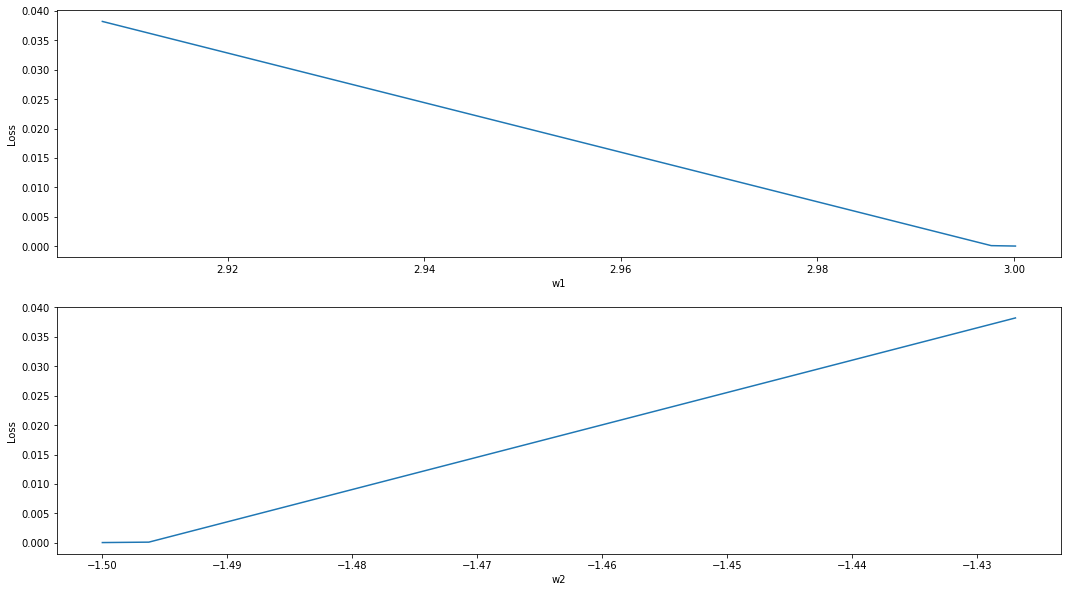

In [ ]:
import matplotlib.pyplot as plt
w1_list = []
w2_list = []
for w in range(len(w_list)):
  w1_list.append(w_list[w][0])
  w2_list.append(w_list[w][1])

plt.figure(figsize=(18,10))

plt.subplot(2,1,1)
plt.plot(w1_list, loss_list)
plt.xlabel('w1')
plt.ylabel('Loss')

plt.subplot(2,1,2)
plt.plot(w2_list, loss_list)
plt.xlabel('w2')
plt.ylabel('Loss')

concise implementation of linear regression 
- api 사용해보기

In [ ]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l


true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [ ]:
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [ ]:
next(iter(data_iter))

[tensor([[-0.1458, -1.2239],
         [-0.9111,  2.2632],
         [-1.4124, -0.2675],
         [-0.2568, -0.2376],
         [ 0.1683, -1.5997],
         [ 2.2698,  1.3057],
         [-0.8408,  1.6544],
         [-1.1522, -0.5210],
         [ 1.1746, -0.0175],
         [-0.7214, -0.2995],
         [-0.8440, -1.3150],
         [-2.2543, -0.1041],
         [ 0.2434,  1.5835],
         [-0.0990, -0.0039],
         [ 1.2045,  1.8135],
         [ 0.3800,  0.7171],
         [ 0.4399, -1.3841],
         [-1.6475,  1.1434],
         [-1.0012,  0.7399],
         [-0.5113, -0.4024]]), tensor([[ 6.9109],
         [-0.6277],
         [ 1.6746],
         [ 5.0683],
         [ 8.3967],
         [10.3522],
         [ 0.4811],
         [ 2.8250],
         [ 9.0551],
         [ 3.7838],
         [ 4.9263],
         [-1.1083],
         [ 3.8614],
         [ 5.2120],
         [ 6.3947],
         [ 5.5768],
         [ 8.8816],
         [-1.1570],
         [ 1.3858],
         [ 4.5661]])]

In [ ]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

In [ ]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [ ]:
loss = nn.MSELoss()

In [ ]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [ ]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000360
epoch 2, loss 0.000098
epoch 3, loss 0.000099


In [ ]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([-0.0005, -0.0004])
error in estimating b: tensor([-0.0008])
